<a href="https://colab.research.google.com/github/SakshiN02/Python-Projects/blob/main/COVID_19_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px

In [3]:
df = pd.read_csv("/content/covid_19_clean_complete.csv")

df

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
16510,Liaoning,China,41.29560,122.608500,2020-03-25,127,2,124,1,Western Pacific
16511,Macau,China,22.16670,113.550000,2020-03-25,30,0,10,20,Western Pacific
16512,Ningxia,China,37.26920,106.165500,2020-03-25,75,0,75,0,Western Pacific
16513,Qinghai,China,35.74520,95.995600,2020-03-25,18,0,18,0,Western Pacific


<hr1> EDA - Exploratory Data Analysis<hr/>

In [4]:
#renaming the columns accourding to our convenience
df.rename(columns={"Date":"date",
                   "Province/State":"state",
                   "Country/Region":"country",
                   "Lat":"lat","Long":"long",
                   "Confirmed":"confirmed",
                   "Deaths":"deaths",
                   "Recovered":"recovered"
                   },inplace = True)

In [5]:
df.head() #retrieves the first five records of all the columns in the dataframe


,state,country,lat,long,date,confirmed,deaths,recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [6]:
#checking the null values
df.isnull().sum()

,0
state,11559
country,0
lat,0
long,0
date,0
confirmed,0
deaths,0
recovered,0
Active,0
WHO Region,0


In [7]:
#since there are so many null values in state column we will remove it
df.drop(["state"], axis = 1, inplace = True )
df

,country,lat,long,date,confirmed,deaths,recovered,Active,WHO Region
0,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...
16510,China,41.29560,122.608500,2020-03-25,127,2,124,1,Western Pacific
16511,China,22.16670,113.550000,2020-03-25,30,0,10,20,Western Pacific
16512,China,37.26920,106.165500,2020-03-25,75,0,75,0,Western Pacific
16513,China,35.74520,95.995600,2020-03-25,18,0,18,0,Western Pacific


#VISUALIZATIONS

<hr>

 Building a barplot using the columns 'WHO Region' at x-axis and 'confirmed' at y-axis respectively.Keeping the title as "Region VS Confirmed Cases" along with xlabel as "Region" and ylabel as "Confirmed Cases"

<hr/>

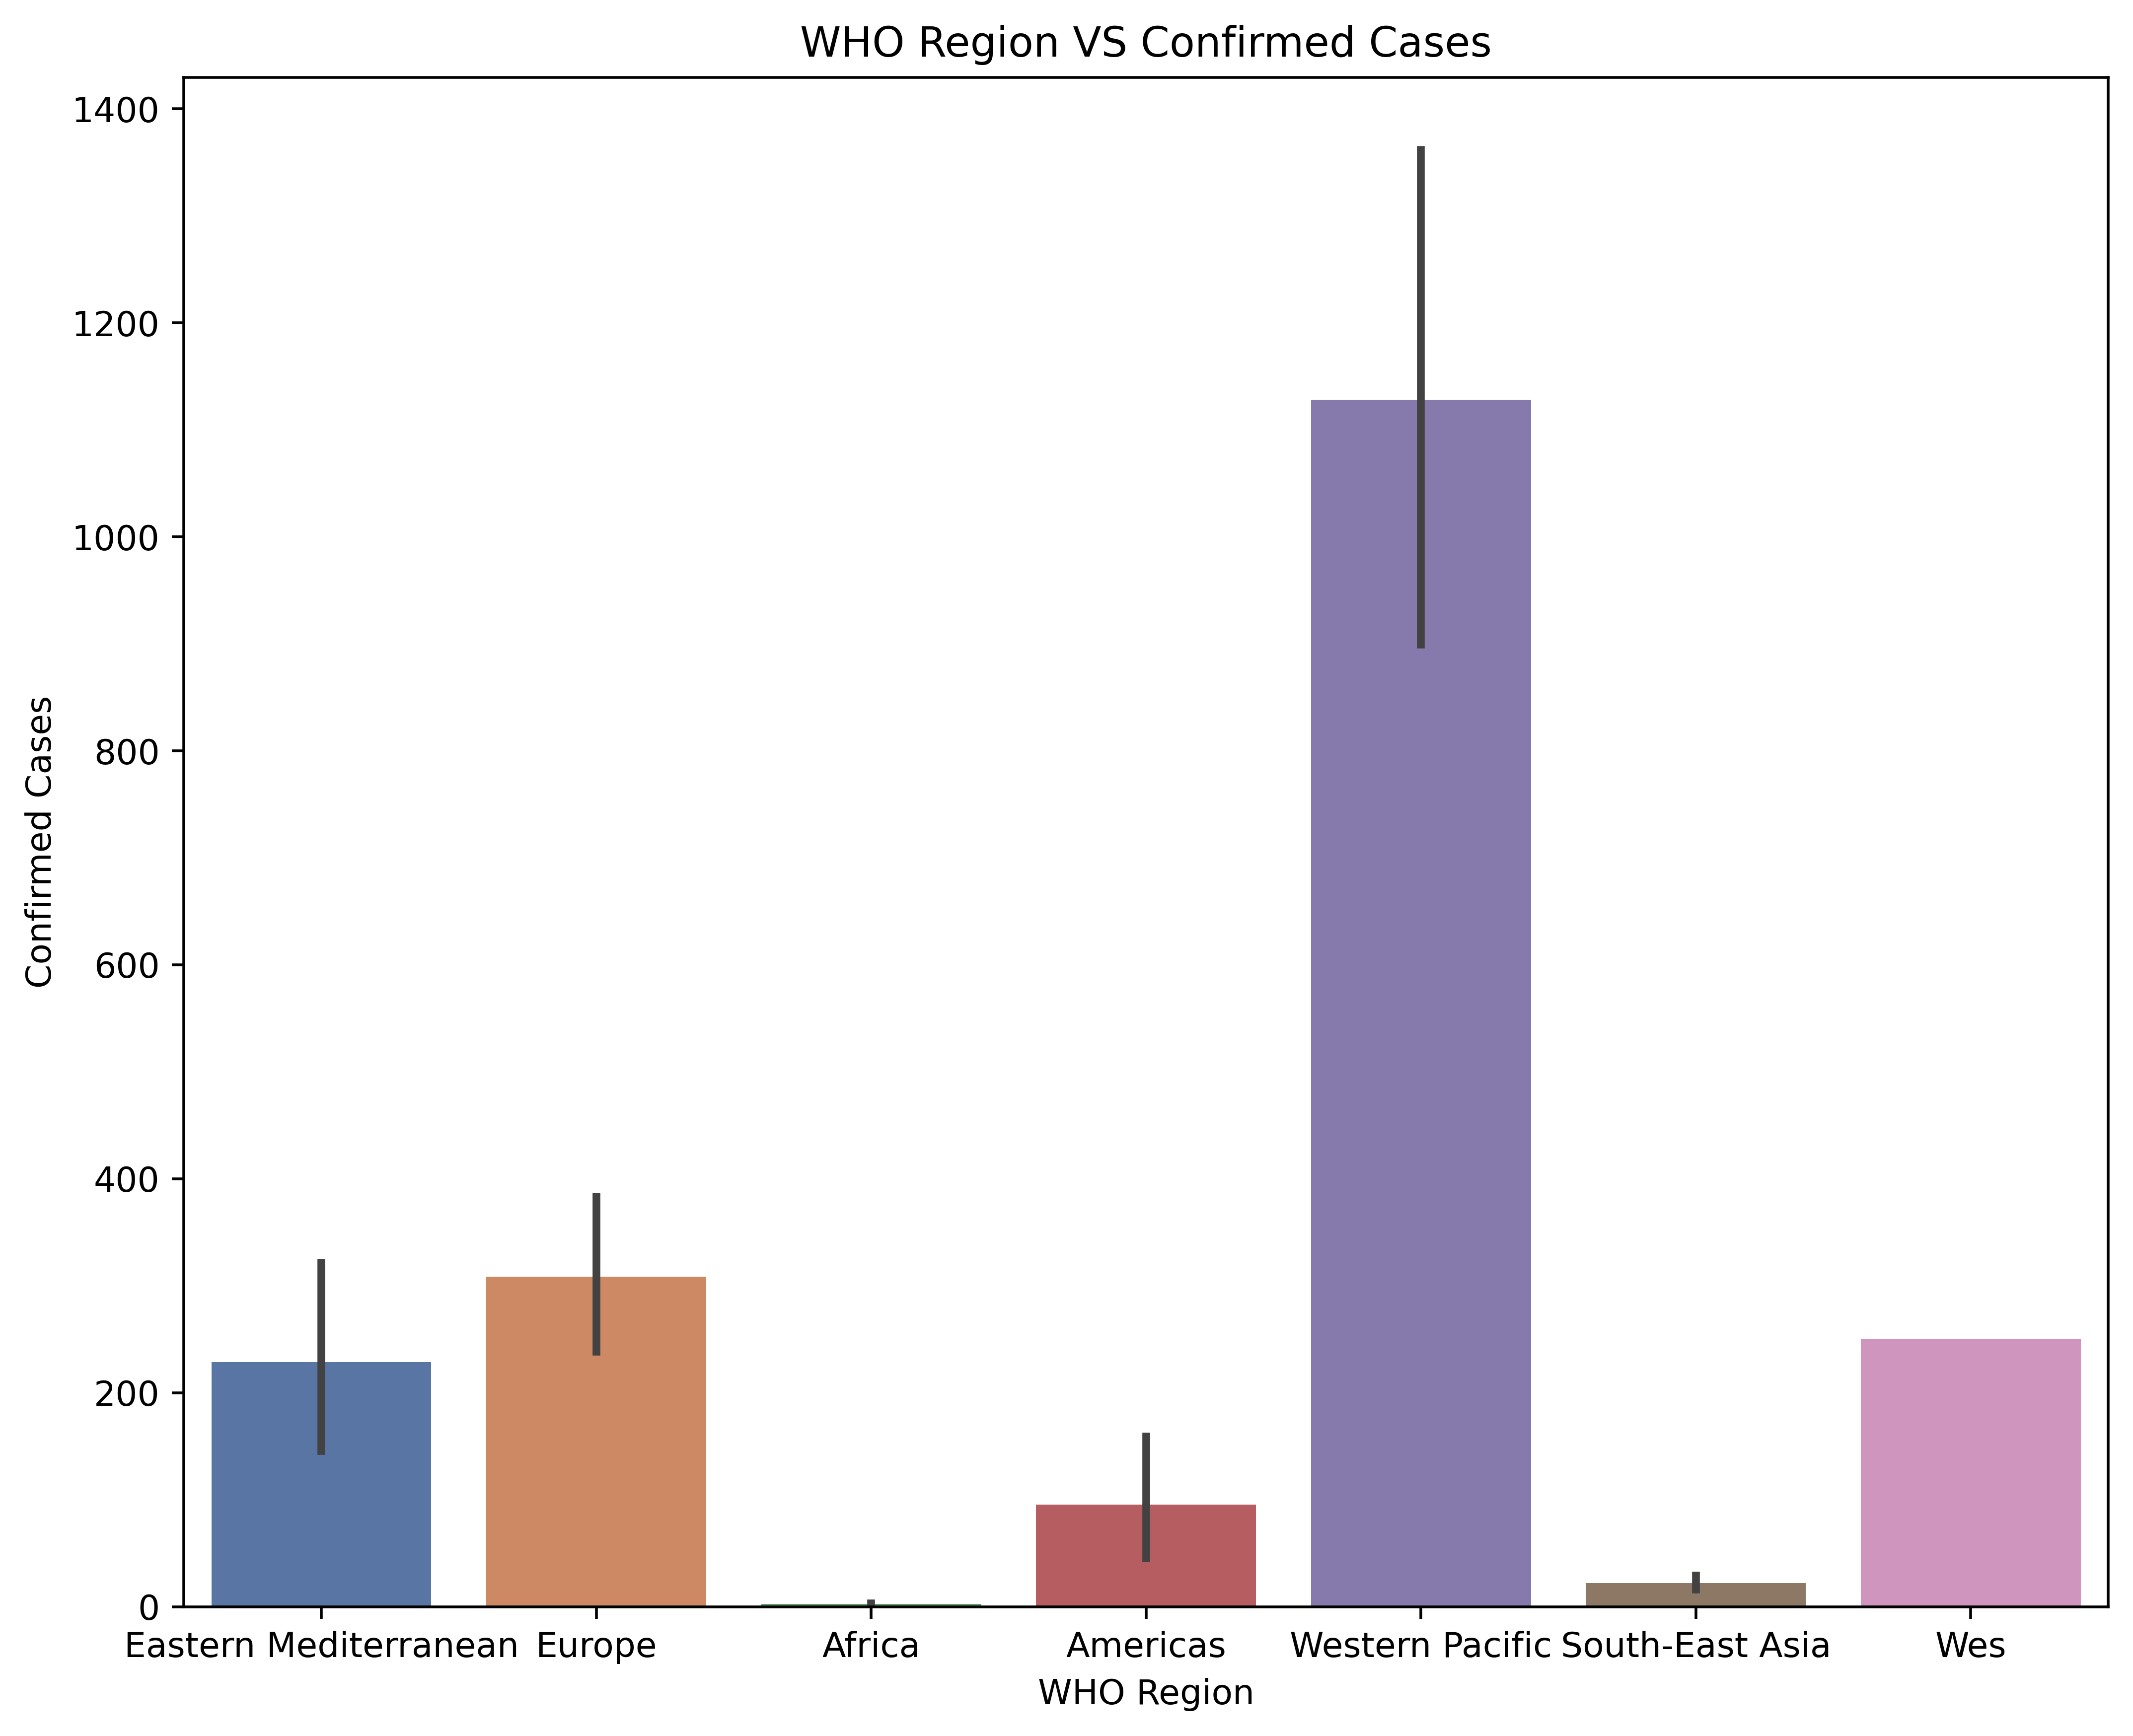

In [8]:
plt.figure(figsize = (10,8) , dpi = 500)
sns.barplot(data = df, x = 'WHO Region', y = 'confirmed' ,palette = "deep" , hue = "WHO Region" , legend = False)
plt.xlabel("WHO Region")
plt.ylabel("Confirmed Cases")
plt.title("WHO Region VS Confirmed Cases")
plt.show()

<hr>


Building a barplot to display the top 10 countries with the most active cases.
Setting the xticks and yticks font size to 15.and keeping the xlabel as "Total Cases" and ylabel as "Country".Setting the title of the chart as "Top 10 countries having most active cases".Storing it in a variable called ax.

<hr/>

In [9]:
#most active cases by country
top_actives = df.groupby(by = "country")["Active"].sum().sort_values(ascending = False).head(10).reset_index()
top_actives

,country,Active
0,China,1691425
1,Italy,468250
2,US,218554
3,Spain,201827
4,Germany,192397
5,Iran,173280
6,South Korea,167799
7,France,132602
8,United Kingdom,87575
9,Switzerland,56930


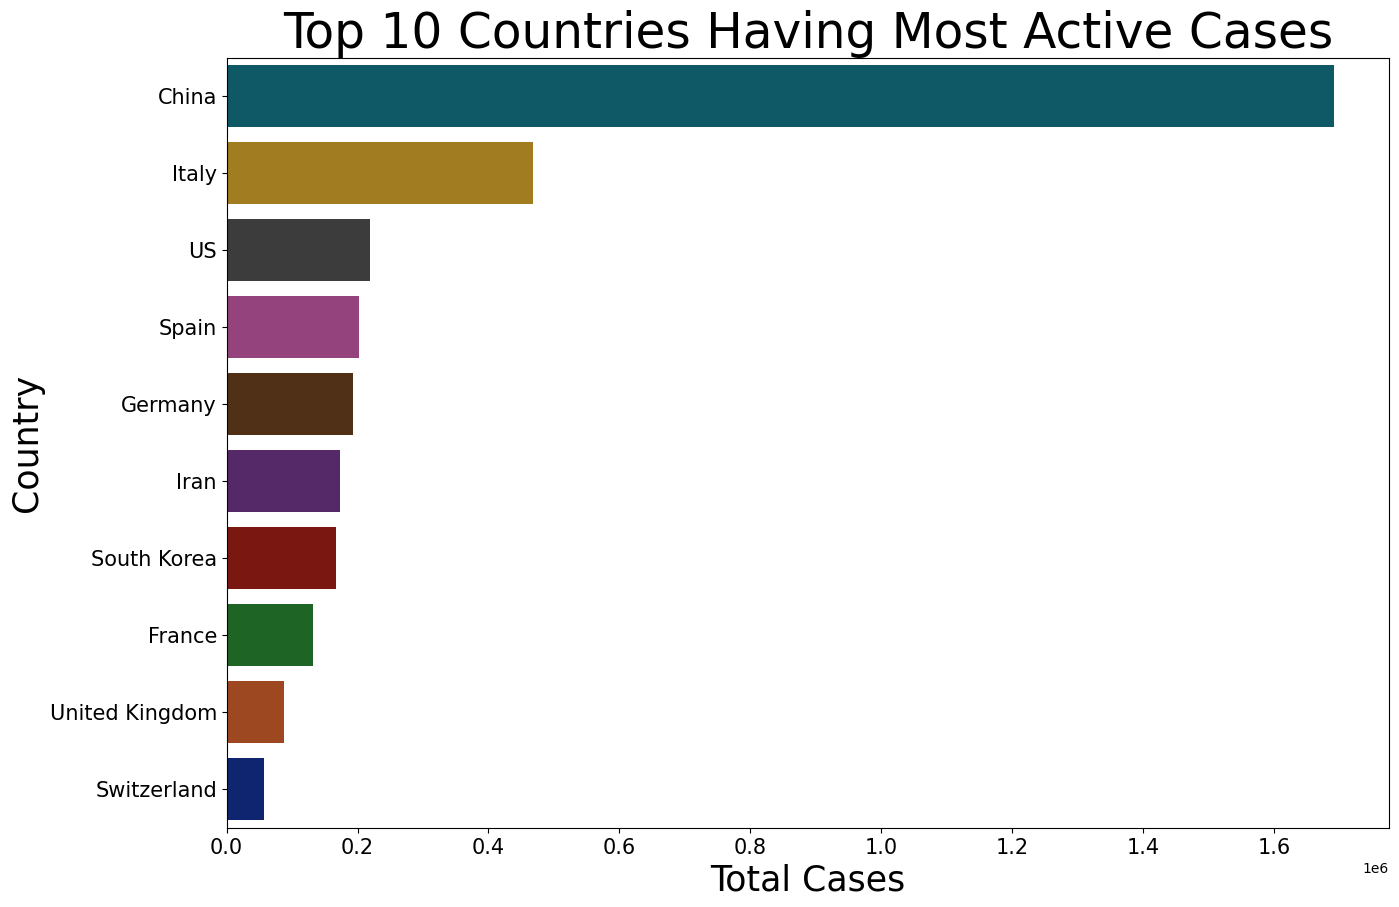

In [10]:
plt.figure(figsize = (15,10))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Total Cases" , fontsize = 25)
plt.ylabel("Country" , fontsize = 25)
plt.title("Top 10 Countries Having Most Active Cases",  fontsize= 35)
ax = sns.barplot(data = df, x = top_actives.Active , y = top_actives.country , palette = "dark", hue = top_actives.Active , legend = False )
plt.show()

# Trends of Covid-19 Cases

<hr>

Here we are plotting a lineplot to understand the trends of Active cases against Date of the cases.

The columns "date" and "Active" are kept as x and y-axis respectively and the title is "Active Cases VS Date Of The Cases."

<hr/>

In [11]:
#plotting a graph between "Date Of The Cases" and "Active Cases"
fig1=px.line(df,x="date", y="Active", title="Active Cases VS Date of Cases")
fig1.show()


<h5>
INSIGHTS -

This line graph displays the number of active cases over time, with the date of cases on the x-axis and the number of active cases on the y-axis. The plot shows the trend of active cases from January 22, 2020, to July 27, 2020, with a total of 187 data points.

The graph reveals a dramatic increase in active cases over the past six months. On January 22, 2020, there were 399 active cases, but by July 27, 2020, this number had surged to approximately 2,816,000 cases, representing a staggering growth of over 700,000%. The plot shows a rapid acceleration of active cases, with the number of cases increasing exponentially over time.
<h5/>

In [12]:
df.columns

Index(['country', 'lat', 'long', 'date', 'confirmed', 'deaths', 'recovered',
       'Active', 'WHO Region'],
      dtype='object')

<hr>

Here we are plotting a lineplot to understand the trends of Death cases against the Region.

The columns "country" and "deaths" are kept as x and y-axis respectively and the title is "Country VS Death Cases."

<hr/>

In [13]:
#most death cases by country
top_deaths = df.groupby(by = "country")["deaths"].sum().sort_values(ascending = False).head(10).reset_index()
top_deaths

,country,deaths
0,China,125963
1,Italy,47045
2,Iran,16870
3,Spain,12464
4,France,4831
5,US,4301
6,United Kingdom,2136
7,South Korea,1677
8,Netherlands,1181
9,Germany,675


In [14]:
fig2 = px.line(top_deaths, x = "country", y = "deaths", title = "Country VS Death Cases")
fig2.show()

<h5>

INSIGHTS-

This line graph displays the top 10 countries with the highest number of death cases, with the country on the x-axis and the number of death cases on the y-axis. The plot shows the ranking of countries by their total death cases, in descending order.

The graph reveals that the United States has the largest number of death cases, with a staggering 11,011,000 deaths. On the other end of the spectrum, Belgium has the smallest number of death cases among the top 10, with 963,679 deaths. The other countries in the top 10, in order of their death cases, are United Kingdom, Brazil, Italy, France, Spain, Mexico, India and Iran.
<h5/>

<hr>

Now we are retrieving the information about the Death, Active, Recovered and confirmed cases of some countries.

<hr/>

In [15]:
#Cases in India
India = df[df.country == "India"]
India = India.groupby(by = "date")[["confirmed","Active","recovered","deaths"]].sum().reset_index()
India

,date,confirmed,Active,recovered,deaths
0,2020-01-22,0,0,0,0
1,2020-01-23,0,0,0,0
2,2020-01-24,0,0,0,0
3,2020-01-25,0,0,0,0
4,2020-01-26,0,0,0,0
...,...,...,...,...,...
58,2020-03-20,244,219,20,5
59,2020-03-21,330,303,23,4
60,2020-03-22,396,362,27,7
61,2020-03-23,499,462,27,10


In [16]:
#Cases in US
US = df[df.country == "US"]
US = US.groupby(by = "date")[["confirmed","Active","recovered","deaths"]].sum().reset_index()
US

,date,confirmed,Active,recovered,deaths
0,2020-01-22,1,1,0,0
1,2020-01-23,1,1,0,0
2,2020-01-24,2,2,0,0
3,2020-01-25,2,2,0,0
4,2020-01-26,5,5,0,0
...,...,...,...,...,...
58,2020-03-20,19479,18970,147,362
59,2020-03-21,25825,25193,176,456
60,2020-03-22,33761,32982,178,601
61,2020-03-23,43850,42888,178,784


In [17]:
#Cases in Russia
Russia = df[df.country == "Russia"]
Russia = Russia.groupby(by = "date")[["confirmed","Active","recovered","deaths"]].sum().reset_index()
Russia

,date,confirmed,Active,recovered,deaths
0,2020-01-22,0,0,0,0
1,2020-01-23,0,0,0,0
2,2020-01-24,0,0,0,0
3,2020-01-25,0,0,0,0
4,2020-01-26,0,0,0,0
...,...,...,...,...,...
58,2020-03-20,253,243,9,1
59,2020-03-21,306,293,12,1
60,2020-03-22,367,350,16,1
61,2020-03-23,438,421,16,1


<h2>Plotting a Graph of Confirmed Cases over time of the three countries analyzed above<h2/>

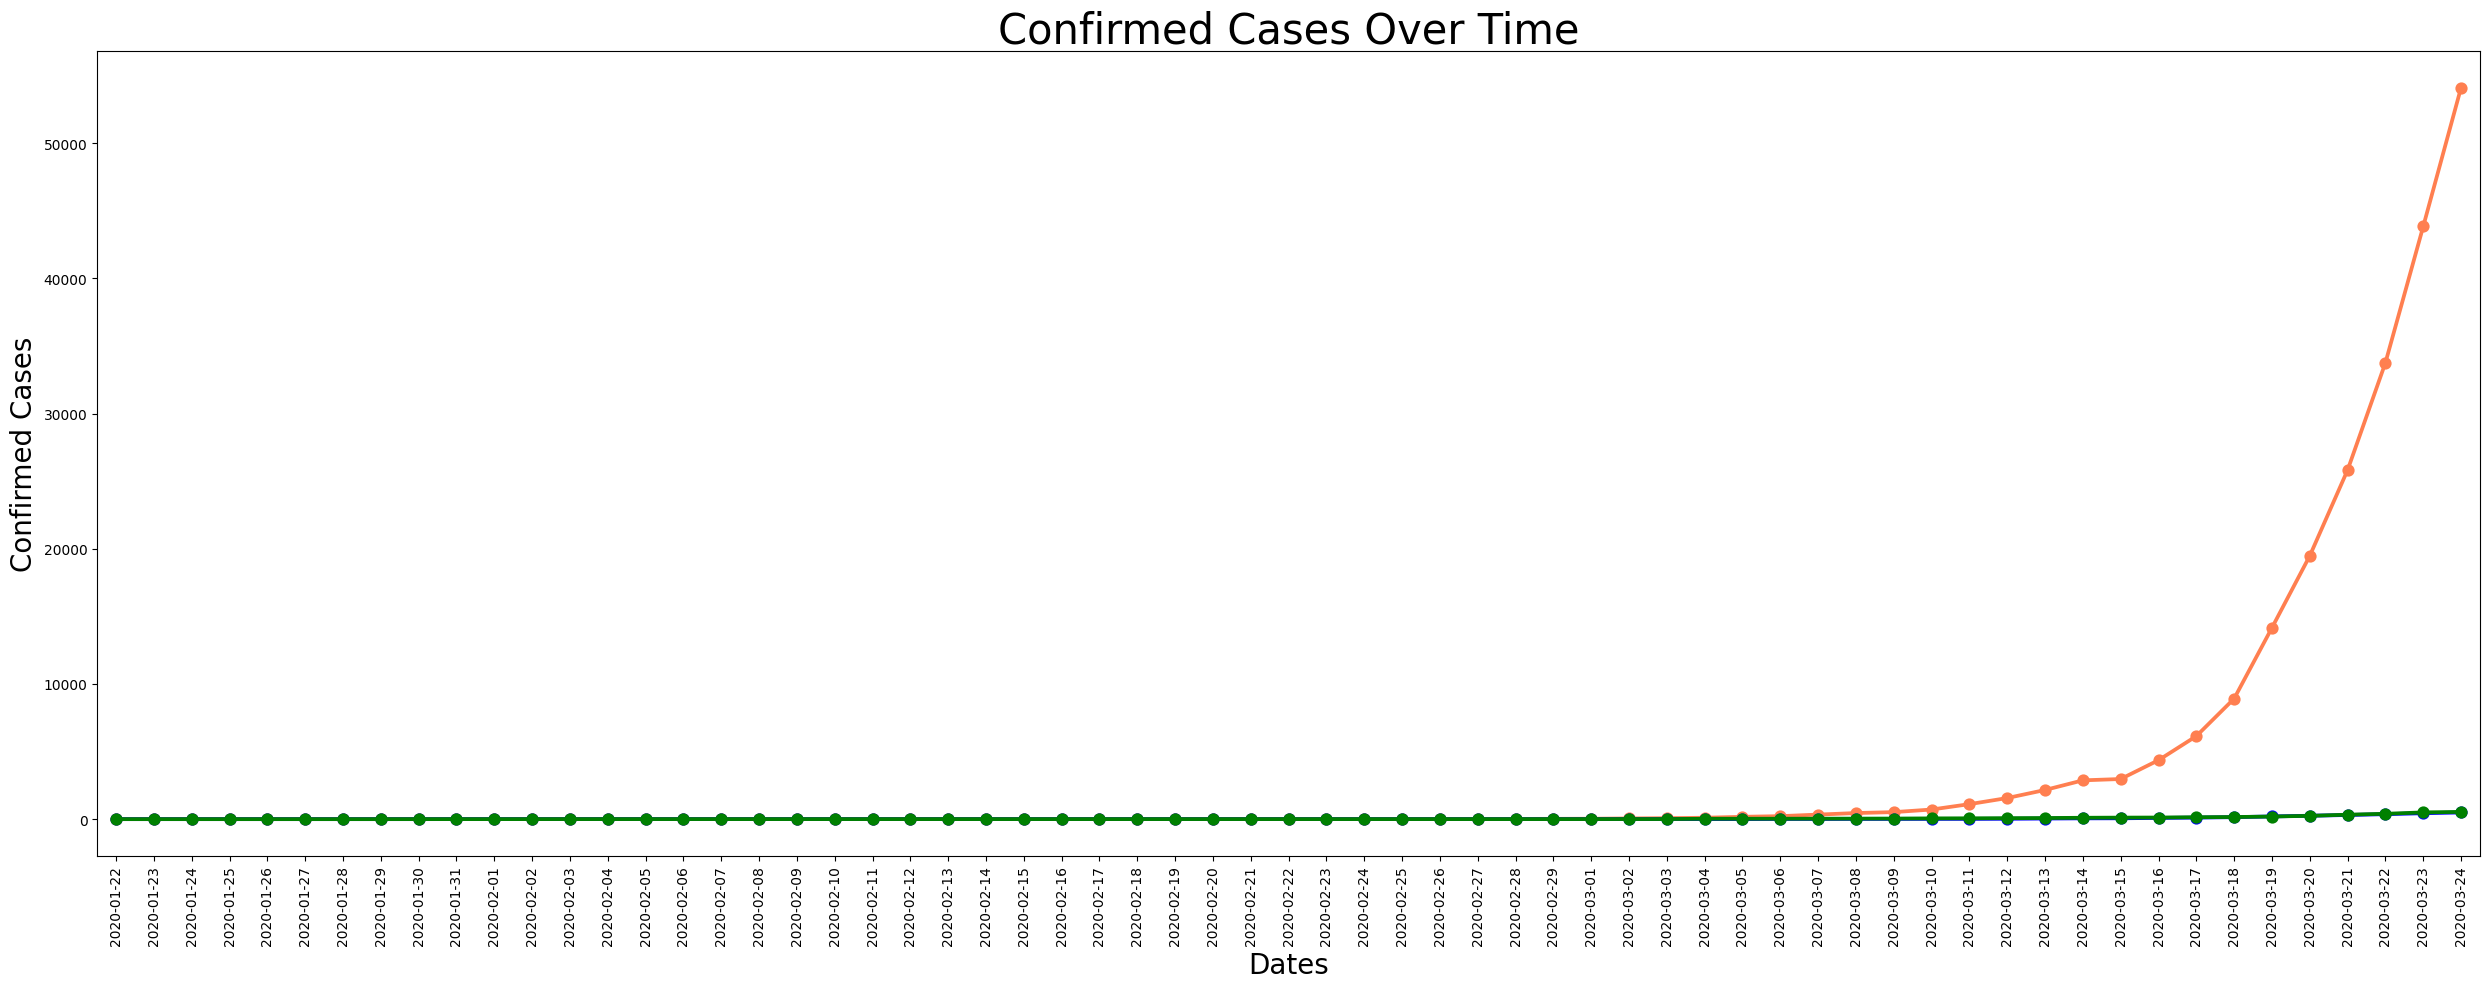

In [18]:
plt.figure(figsize = (25,10))
plt.xticks(rotation = 90)
sns.pointplot(x = US.date , y = US.confirmed , color = "coral")
sns.pointplot(x = Russia.date , y = Russia.confirmed , color = "blue")
sns.pointplot(x = India.date , y = India.confirmed , color = "green")
plt.xlabel("Dates", fontsize = 20)
plt.ylabel("Confirmed Cases", fontsize = 20)
plt.title("Confirmed Cases Over Time" , fontsize = 30)
plt.tight_layout()
plt.show()


COVID-19 Trends Over Time (Line Plot)

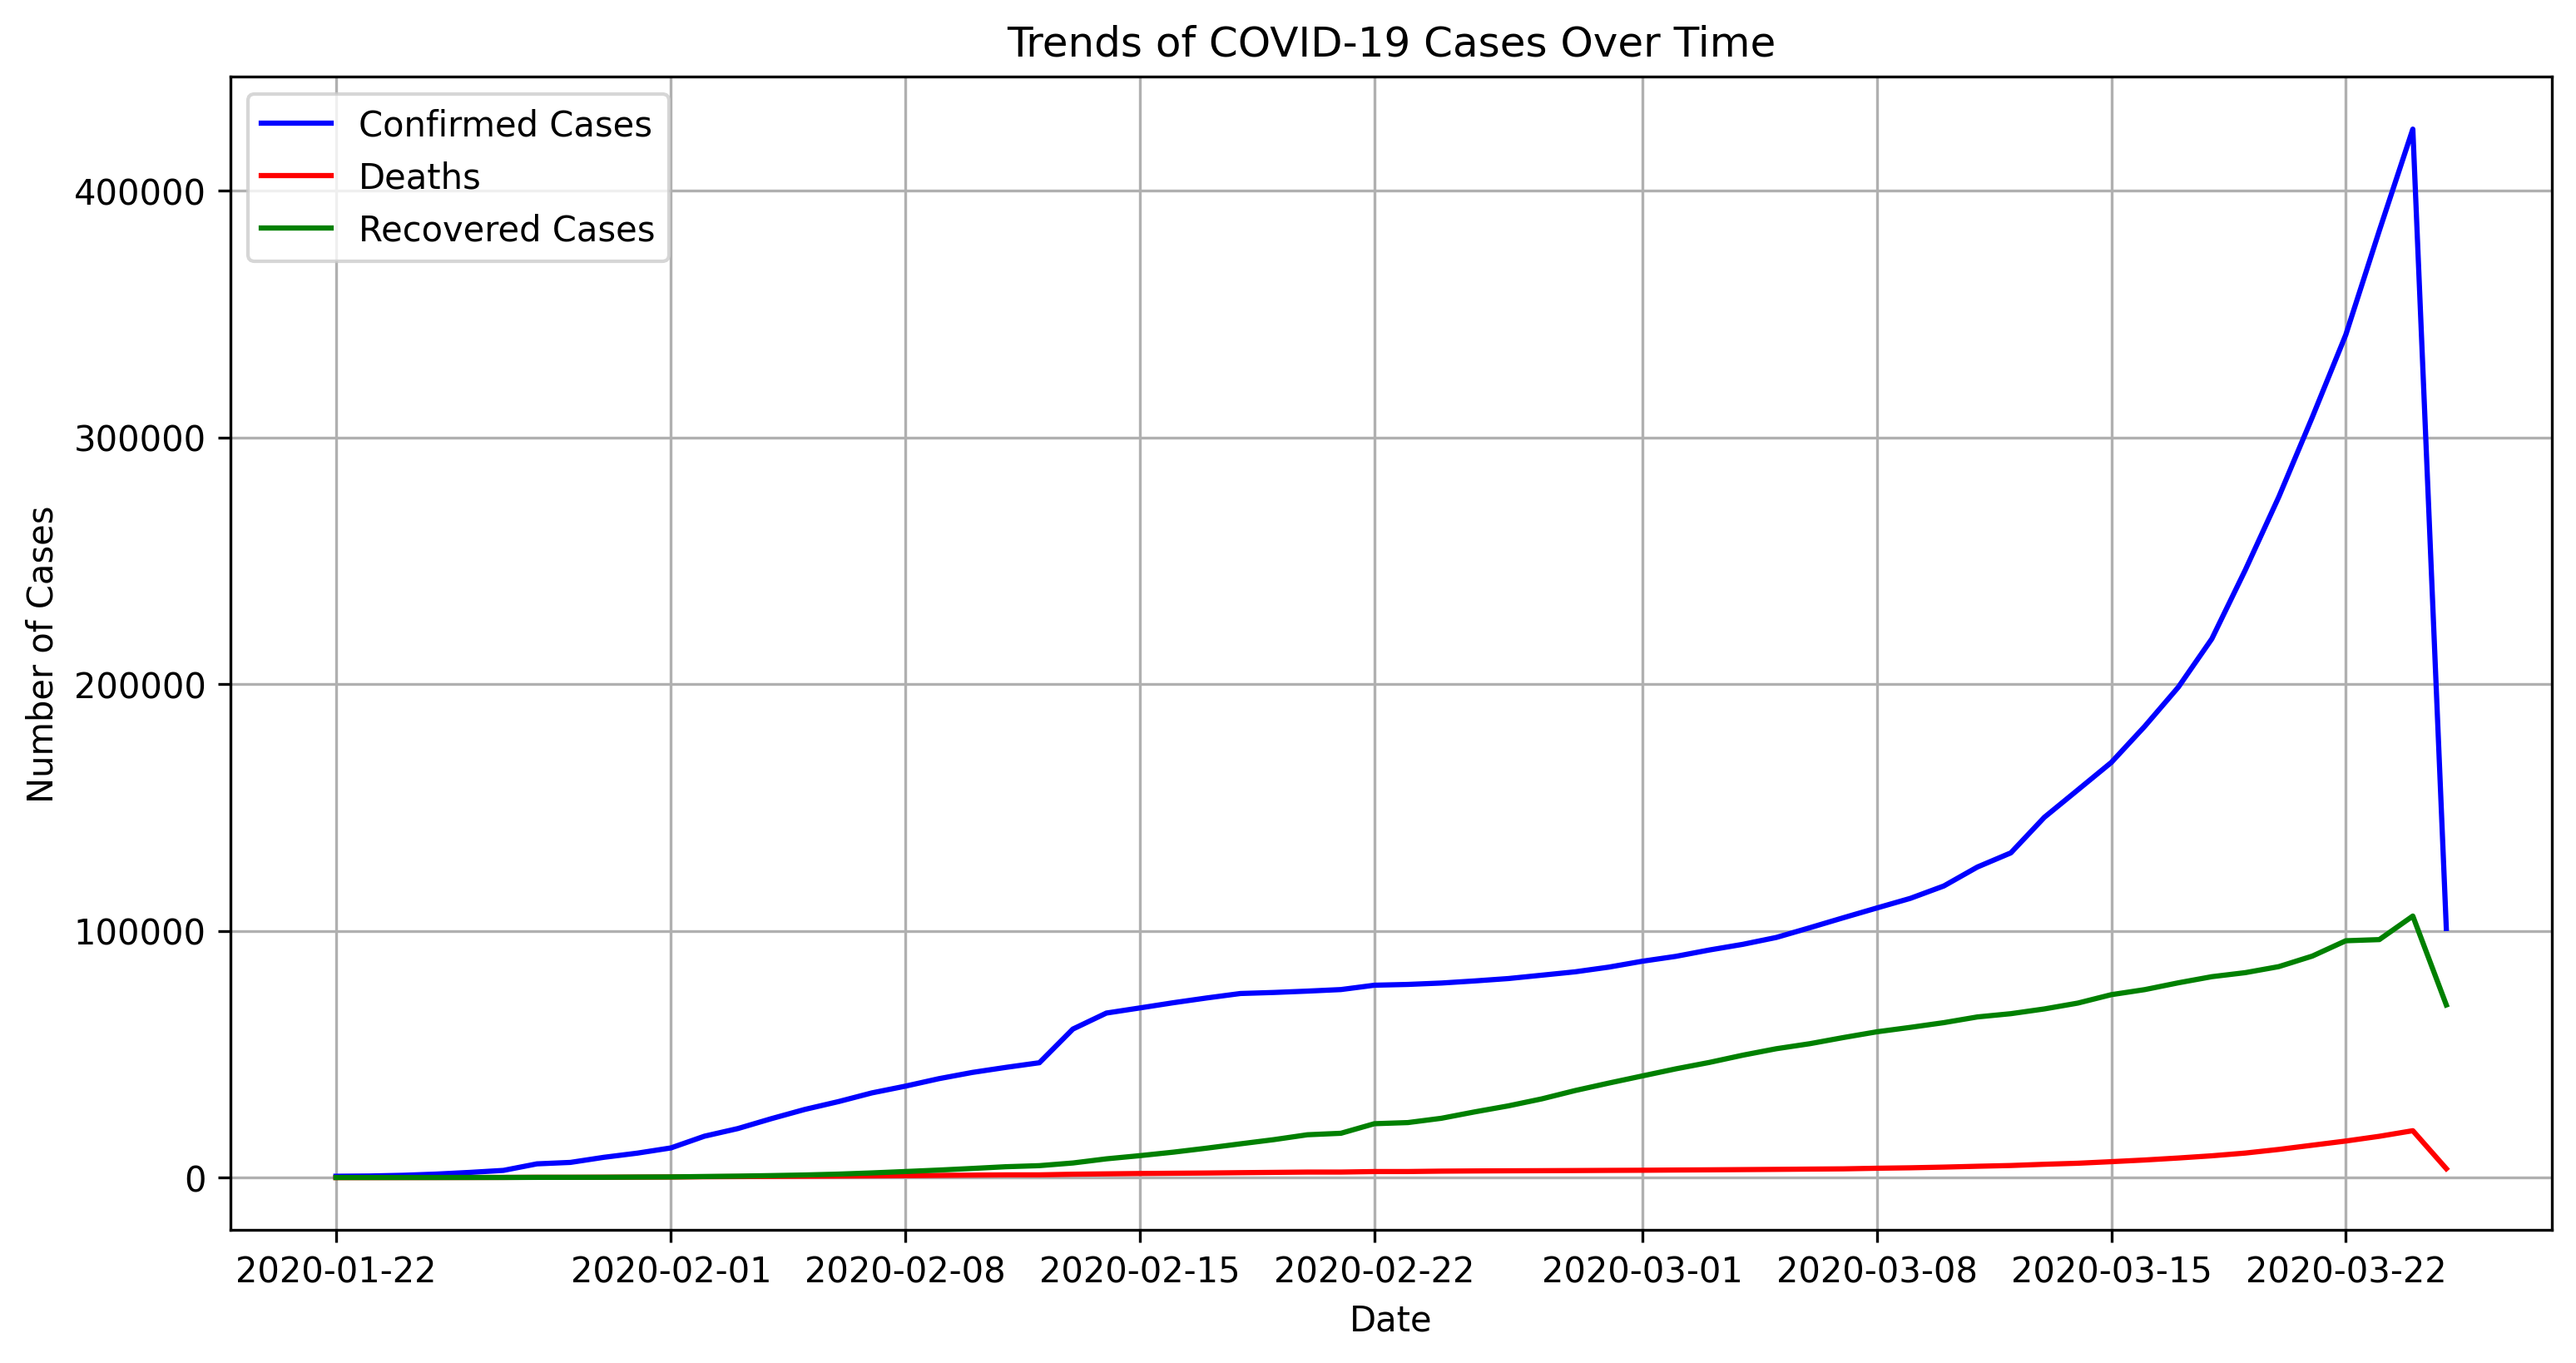

In [19]:
import matplotlib.pyplot as plt

# Convert 'date' column to datetime if not already
df['date'] = pd.to_datetime(df['date'])

# Group data by date and sum cases
df_grouped = df.groupby('date')[['confirmed', 'deaths', 'recovered']].sum()

# Plot the trends
plt.figure(figsize=(12,6), dpi=300)
plt.plot(df_grouped.index, df_grouped['confirmed'], label="Confirmed Cases", color='blue')
plt.plot(df_grouped.index, df_grouped['deaths'], label="Deaths", color='red')
plt.plot(df_grouped.index, df_grouped['recovered'], label="Recovered Cases", color='green')

# Labels and title
plt.xlabel("Date")
plt.ylabel("Number of Cases")
plt.title("Trends of COVID-19 Cases Over Time")
plt.legend()
plt.grid(True)
plt.show()

<h5>

INSIGHTS-

This point plot displays the cumulative confirmed cases of COVID-19 in the United States, Russia, and India from January 22, 2020, to July 27, 2020. The x-axis represents the dates, and the y-axis represents the number of confirmed cases.

The graph reveals a stark increase in confirmed cases over time, with all three countries exhibiting a similar trend. On January 22, 2020, the starting point of the data, the number of confirmed cases was zero. However, as the pandemic spread, the number of confirmed cases surged, with the United States experiencing the most significant increase by July 27, 2020. Russia and India also saw substantial growth by the same date.
<h5/>

#FORECASTING

In [20]:
!pip install prophet

In [21]:
from prophet import Prophet

In [22]:
df

,country,lat,long,date,confirmed,deaths,recovered,Active,WHO Region
0,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...
16510,China,41.29560,122.608500,2020-03-25,127,2,124,1,Western Pacific
16511,China,22.16670,113.550000,2020-03-25,30,0,10,20,Western Pacific
16512,China,37.26920,106.165500,2020-03-25,75,0,75,0,Western Pacific
16513,China,35.74520,95.995600,2020-03-25,18,0,18,0,Western Pacific


In [23]:
Confirmed = df.groupby(by = "date").sum()["confirmed"].reset_index()
Active = df.groupby(by = "date").sum()["Active"].reset_index()
Deaths = df.groupby(by = "date").sum()["deaths"].reset_index()
Recovered = df.groupby(by = "date").sum()["recovered"].reset_index()

In [24]:
Confirmed

,date,confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
59,2020-03-21,308175
60,2020-03-22,341585
61,2020-03-23,383750
62,2020-03-24,424889


In [25]:
Active

,date,Active
0,2020-01-22,510
1,2020-01-23,606
2,2020-01-24,879
3,2020-01-25,1353
4,2020-01-26,2010
...,...,...
59,2020-03-21,205266
60,2020-03-22,230764
61,2020-03-23,270546
62,2020-03-24,299876


In [26]:
Deaths

,date,deaths
0,2020-01-22,17
1,2020-01-23,18
2,2020-01-24,26
3,2020-01-25,42
4,2020-01-26,56
...,...,...
59,2020-03-21,13134
60,2020-03-22,14831
61,2020-03-23,16748
62,2020-03-24,19016


In [27]:
Recovered

,date,recovered
0,2020-01-22,28
1,2020-01-23,30
2,2020-01-24,36
3,2020-01-25,39
4,2020-01-26,52
...,...,...
59,2020-03-21,89775
60,2020-03-22,95990
61,2020-03-23,96456
62,2020-03-24,105997


<hr>

 Forecasting for confirmed cases

 For building a forecasting model using fbProphet library,there would be only 2 columns passed.

 The column names would be --> 'ds','y'
<hr/>

In [28]:
Confirmed.rename(columns = {"date":"ds", "confirmed":"y"} , inplace = True)
Confirmed

,ds,y
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
59,2020-03-21,308175
60,2020-03-22,341585
61,2020-03-23,383750
62,2020-03-24,424889


In [29]:
#building and fitting the model
model = Prophet(interval_width = 0.95)
model.fit(Confirmed)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpl6oznujj/bizdk31g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpl6oznujj/lysswebj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26361', 'data', 'file=/tmp/tmpl6oznujj/bizdk31g.json', 'init=/tmp/tmpl6oznujj/lysswebj.json', 'output', 'file=/tmp/tmpl6oznujj/prophet_modeldoou9i0o/prophet_model-20250322033641.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
03:36:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:36:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [30]:
#calculating the upper and lower bounds uncertainity levels
future = model.make_future_dataframe(periods = 7)  # we want a short term forecasting that's why the periods parameter value is 7

In [31]:
future.tail(10)

,ds
61,2020-03-23
62,2020-03-24
63,2020-03-25
64,2020-03-26
65,2020-03-27
66,2020-03-28
67,2020-03-29
68,2020-03-30
69,2020-03-31
70,2020-04-01


<h4>

ds: the date column, which represents the future dates for which the forecasts were generated.

yhat: the forecasted values, which are the predicted values of the time series.

yhat_lower and yhat_upper: the lower and upper bounds of the uncertainty interval, respectively, which represent the range of possible values for the forecasted values.

This code predicts the future values of the time series using the Prophet model, and then selects the last 7 rows of the forecast DataFrame, showing the date, forecasted value, and uncertainty interval for each date.

<h4/>

In [32]:
#forecasting
forecast = model.predict(future)
forecast[['ds','yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
64,2020-03-26,259430.938686,181245.752297,341736.407531
65,2020-03-27,268359.645684,186863.210171,349741.088642
66,2020-03-28,276905.186303,197483.378129,356423.360110
67,2020-03-29,285814.118423,200082.202342,366839.890505
68,2020-03-30,295817.333036,222805.072250,372328.051020
69,2020-03-31,306296.479453,225535.517770,390424.346320
70,2020-04-01,281212.917033,198994.999935,357042.986695


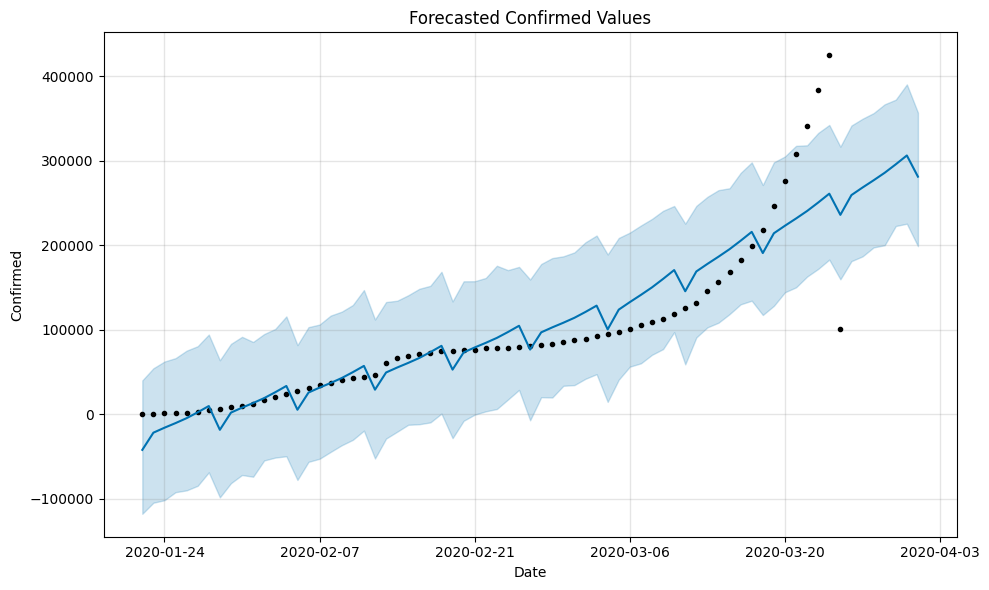

In [33]:
#some plots for understanding the data in a better way

confirmed_forecast_plot = model.plot(forecast)
plt.xlabel('Date')  # Set x-axis label
plt.ylabel('Confirmed')  # Set y-axis label
plt.title('Forecasted Confirmed Values')  # Optional: set a title for the plot
plt.tight_layout()
plt.show()

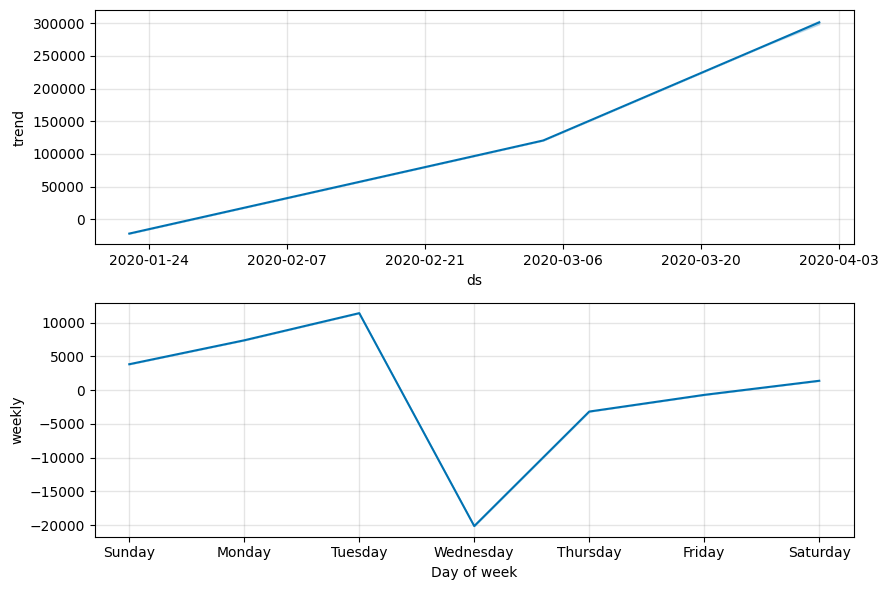

In [34]:
#model.plot_components(forecast) is used to generate a plot that breaks down the forecast into its individual components
confirmed_forecast_plot1 = model.plot_components(forecast)
plt.show()

<hr>

 Forecasting for death cases

 For building a forecasting model using fbProphet library,there would be only 2 columns passed.

 The column names would be --> 'ds','y'
<hr/>

In [35]:
Deaths.rename(columns = {"date":"ds", "deaths":"y"} , inplace = True)
Deaths

,ds,y
0,2020-01-22,17
1,2020-01-23,18
2,2020-01-24,26
3,2020-01-25,42
4,2020-01-26,56
...,...,...
59,2020-03-21,13134
60,2020-03-22,14831
61,2020-03-23,16748
62,2020-03-24,19016


In [36]:
model1 = Prophet(interval_width = 0.95)
model1.fit(Deaths)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpl6oznujj/z0zx2k18.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpl6oznujj/qjgre_gd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95012', 'data', 'file=/tmp/tmpl6oznujj/z0zx2k18.json', 'init=/tmp/tmpl6oznujj/qjgre_gd.json', 'output', 'file=/tmp/tmpl6oznujj/prophet_modelgrssnnx9/prophet_model-20250322033643.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
03:36:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:36:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [37]:
#calculating the upper and lower bounds uncertainity levels
Future_Deaths= model1.make_future_dataframe(periods = 7)  # we want a short term forecasting that's why the periods parameter value is 7

In [38]:
Future_Deaths.tail(10)

,ds
61,2020-03-23
62,2020-03-24
63,2020-03-25
64,2020-03-26
65,2020-03-27
66,2020-03-28
67,2020-03-29
68,2020-03-30
69,2020-03-31
70,2020-04-01


In [39]:
forecast_deaths = model1.predict(Future_Deaths)
forecast_deaths[['ds','yhat', 'yhat_lower', 'yhat_upper']].tail(10)

,ds,yhat,yhat_lower,yhat_upper
61,2020-03-23,10262.055824,6303.835313,14179.461608
62,2020-03-24,10776.546497,6706.445509,14810.476925
63,2020-03-25,9570.965908,5594.753947,13402.719671
64,2020-03-26,10559.857367,6795.740721,14438.081283
65,2020-03-27,10932.951072,6995.924426,14972.956470
66,2020-03-28,11345.359652,7302.474628,15418.983183
67,2020-03-29,11777.535902,7740.240586,15734.015481
68,2020-03-30,12249.446540,8371.921960,16451.011250
69,2020-03-31,12763.937213,8657.831562,16515.934381
70,2020-04-01,11558.356625,7420.166636,15511.721233


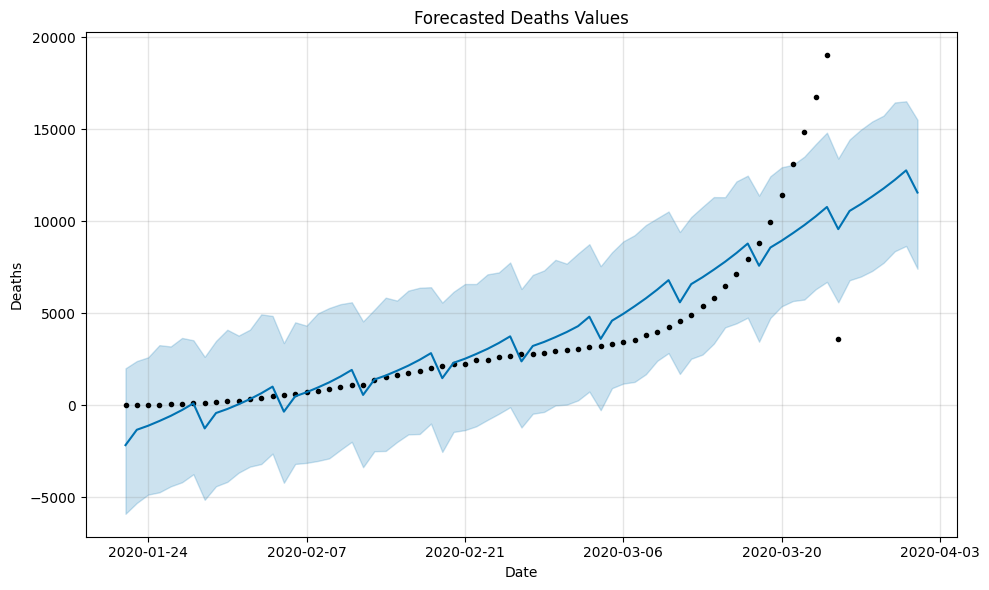

In [40]:
#some plots for understanding the data in a better way

deaths_forecast_plot = model1.plot(forecast_deaths)
plt.xlabel('Date')  # Set x-axis label
plt.ylabel('Deaths')  # Set y-axis label
plt.title('Forecasted Deaths Values')  # Optional: set a title for the plot
plt.tight_layout()
plt.show()

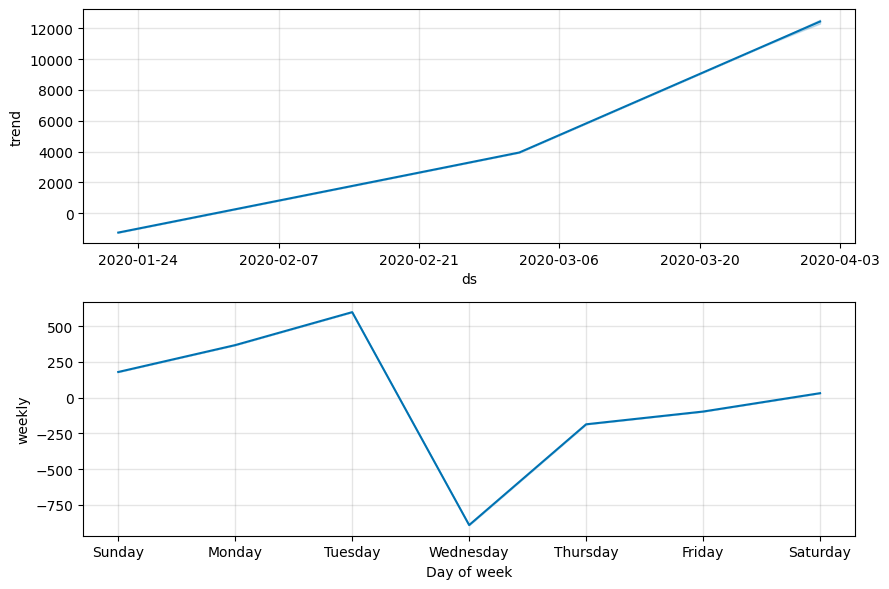

In [41]:
#model1.plot_components(forecast) is used to generate a plot that breaks down the forecast into its individual components

deaths_forecast_plot1 = model1.plot_components(forecast_deaths)
plt.tight_layout()
plt.show()